In [64]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

# Analyze Pilgrim's 1999 Data

In [65]:
df = pd.read_csv('PA_pilgramA_data.csv', index_col=0)
df.head()

,profit_99,online_99,age_99,income_99,tenure_99,district_99
﻿id,,,,,,
1,21,0,NaN,NaN,6.33,1200
2,-6,0,6.0,3.0,29.50,1200
3,-49,1,5.0,5.0,26.41,1100
4,-4,0,NaN,NaN,2.25,1200
5,-61,0,2.0,9.0,9.91,1200


In [66]:
new_col_mapping = {c: c[:-3] for c in df.columns}
# df.rename(columns=new_col_mapping, inplace=True)
df.describe()

/Users/samstone/venvs/wonolo/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,profit_99,online_99,age_99,income_99,tenure_99,district_99
count,31634.000000,31634.000000,23345.000000,23373.000000,31634.000000,31634.000000
mean,111.502687,0.121831,4.046048,5.458777,10.162690,1203.186445
std,272.839391,0.327096,1.642316,2.346881,8.453867,47.906512
min,-221.000000,0.000000,1.000000,1.000000,0.160000,1100.000000
25%,-34.000000,0.000000,NaN,NaN,3.750000,1200.000000
50%,9.000000,0.000000,NaN,NaN,7.410000,1200.000000
75%,164.000000,0.000000,NaN,NaN,14.750000,1200.000000
max,2071.000000,1.000000,7.000000,9.000000,41.160000,1300.000000


In [67]:
df.income_99.fillna(float(df.income_99.mode()), inplace=True)
df.age_99.fillna(float(df.age_99.mode()), inplace=True)

online = df[df.online_99 == 1]
offline = df[df.online_99 == 0]

df.head()

,profit_99,online_99,age_99,income_99,tenure_99,district_99
﻿id,,,,,,
1,21,0,3.0,6.0,6.33,1200
2,-6,0,6.0,3.0,29.50,1200
3,-49,1,5.0,5.0,26.41,1100
4,-4,0,3.0,6.0,2.25,1200
5,-61,0,2.0,9.0,9.91,1200


In [68]:
online.describe()

,profit_99,online_99,age_99,income_99,tenure_99,district_99
count,3854.000000,3854.0,3854.000000,3854.000000,3854.000000,3854.000000
mean,116.666840,1.0,3.261546,5.963415,8.653791,1203.632590
std,283.664637,0.0,1.207336,1.982132,6.941097,40.593647
min,-221.000000,1.0,1.000000,1.000000,0.160000,1100.000000
25%,-43.000000,1.0,3.000000,5.000000,3.660000,1200.000000
50%,12.000000,1.0,3.000000,6.000000,6.830000,1200.000000
75%,186.000000,1.0,4.000000,7.000000,11.660000,1200.000000
max,1979.000000,1.0,7.000000,9.000000,39.660000,1300.000000


In [69]:
offline.describe()

,profit_99,online_99,age_99,income_99,tenure_99,district_99
count,27780.000000,27780.0,27780.000000,27780.000000,27780.000000,27780.000000
mean,110.786249,0.0,3.842765,5.549712,10.372024,1203.124550
std,271.300975,0.0,1.504726,2.032887,8.622122,48.834941
min,-221.000000,0.0,1.000000,1.000000,0.160000,1100.000000
25%,-33.000000,0.0,3.000000,4.000000,3.750000,1200.000000
50%,9.000000,0.0,3.000000,6.000000,7.500000,1200.000000
75%,161.000000,0.0,5.000000,6.000000,15.160000,1200.000000
max,2071.000000,0.0,7.000000,9.000000,41.160000,1300.000000


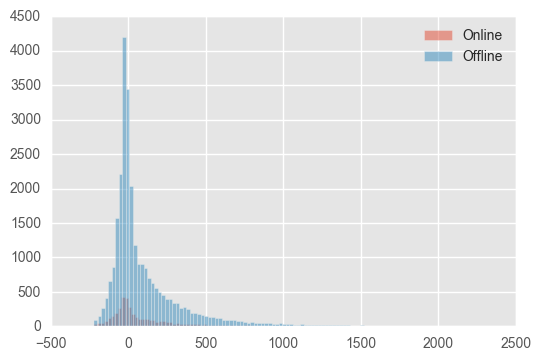

In [70]:
plt.hist(online.profit_99, bins=100, alpha=0.5, label='Online')
plt.hist(offline.profit_99, bins=100, alpha=0.5, label='Offline')
plt.legend(loc='upper right');

We can use this test, if we observe two independent samples from the same or different population, e.g. exam scores of boys and girls or of two ethnic groups. The test measures whether the average (expected) value differs significantly across samples. If we observe a large p-value, for example larger than 0.05 or 0.1, then we cannot reject the null hypothesis of identical average scores. If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages.
(from https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ttest_ind.html)

In [71]:
from scipy.stats import ttest_ind
ttest_results = ttest_ind(online.profit_99, offline.profit_99, axis=0, equal_var=False)
print('T-test results for Profit | Online vs. Offline:')
print('t-statistic: {:.2f}'.format(ttest_results[0]))
print('p-value: {:.2f}'.format(ttest_results[1]))

T-test results for Profit | Online vs. Offline:
t-statistic: 1.21
p-value: 0.23


In [72]:
from scipy.stats import ttest_ind
ttest_results = ttest_ind(online.age_99, offline.age_99, axis=0, equal_var=False)
print('T-test results for Age | Online vs. Offline:')
print('t-statistic: {:.2f}'.format(ttest_results[0]))
print('p-value: {:.2f}'.format(ttest_results[1]))

T-test results for Age | Online vs. Offline:
t-statistic: -27.11
p-value: 0.00


In [73]:
from scipy.stats import ttest_ind
ttest_results = ttest_ind(online.income_99, offline.income_99, axis=0, equal_var=False)
print('T-test results for Income | Online vs. Offline:')
print('t-statistic: {:.2f}'.format(ttest_results[0]))
print('p-value: {:.2f}'.format(ttest_results[1]))

T-test results for Income | Online vs. Offline:
t-statistic: 12.10
p-value: 0.00


In [74]:
from scipy.stats import ttest_ind
ttest_results = ttest_ind(online.tenure_99, offline.tenure_99, axis=0, equal_var=False)
print('T-test results for Tenure | Online vs. Offline:')
print('t-statistic: {:.2f}'.format(ttest_results[0]))
print('p-value: {:.2f}'.format(ttest_results[1]))

T-test results for Tenure | Online vs. Offline:
t-statistic: -13.95
p-value: 0.00


In [75]:
df = pd.get_dummies(df, columns=['district_99'], drop_first=True)
df.head()

,profit_99,online_99,age_99,income_99,tenure_99,district_99_1200,district_99_1300
﻿id,,,,,,,
1,21,0,3.0,6.0,6.33,1.0,0.0
2,-6,0,6.0,3.0,29.50,1.0,0.0
3,-49,1,5.0,5.0,26.41,0.0,0.0
4,-4,0,3.0,6.0,2.25,1.0,0.0
5,-61,0,2.0,9.0,9.91,1.0,0.0


In [76]:
X = sm.add_constant(df[[
    'online_99',
#     'age_99', 
#     'income_99', 
#     'tenure_99', 
#     'district_99_1100',
#     'district_99_1200',
#     'district_99_1300'
]])
sm.OLS(df.profit_99, X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              profit_99   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.572
Date:                Fri, 03 Feb 2017   Prob (F-statistic):              0.210
Time:                        10:53:24   Log-Likelihood:            -2.2232e+05
No. Observations:               31634   AIC:                         4.446e+05
Df Residuals:                   31632   BIC:                         4.447e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        110.7862      1.637     67.678      0.000       107.578   113.995
online_99      5.8806      4.690      1.254      0.210        -3.312    15.073
==============================================================================
Omnibus:                    18552.376   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           169948.260
Skew:                           2.747   Prob(JB):                         0.00
Kurtosis:                      12.937   Cond. No.                         3.11
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

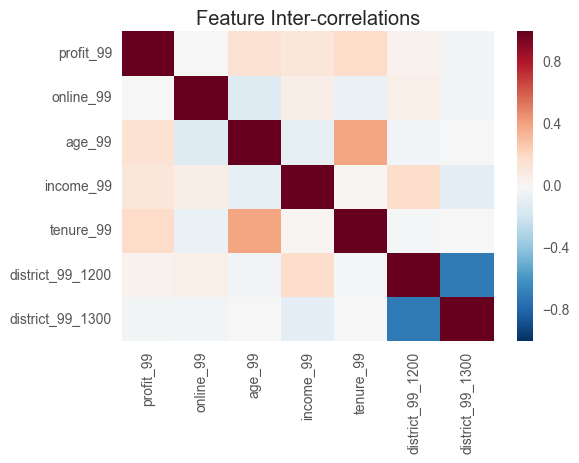

In [77]:
ax = plt.axes()
sns.heatmap(df.corr(), vmin=-1, vmax=1, ax=ax);
ax.set_title("Feature Inter-correlations");

In [78]:
X = sm.add_constant(df[[
    'online_99',
#     'age_99', 
#     'income_99', 
    'tenure_99', 
#     'district_99_1100',
    'district_99_1200',
    'district_99_1300']])
sm.OLS(df.profit_99, X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              profit_99   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     322.7
Date:                Fri, 03 Feb 2017   Prob (F-statistic):          1.10e-272
Time:                        10:53:25   Log-Likelihood:            -2.2168e+05
No. Observations:               31634   AIC:                         4.434e+05
Df Residuals:                   31629   BIC:                         4.434e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
const               15.9632      5.167      3.090      0.002         5.837    26.090
online_99           14.2952      4.615      3.098      0.002         5.250    23.340
tenure_99            6.2448      0.178     35.020      0.000         5.895     6.594
district_99_1200    37.3103      5.077      7.349      0.000        27.359    47.261
district_99_1300    12.3790      6.326      1.957      0.050        -0.019    24.777
==============================================================================
Omnibus:                    18199.887   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           168463.450
Skew:                           2.671   Prob(JB):                         0.00
Kurtosis:                      12.963   Cond. No.                         77.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Append and Analyze 2000 data

In [79]:
df2 = pd.read_csv('PA_pilgramB_data.csv', index_col=0)
df2.head()

,profit_99,online_99,age_99,income_99,tenure_99,district_99,profit_00,online_00
﻿id,,,,,,,,
1,21,0,NaN,NaN,6.33,1200,NaN,NaN
2,-6,0,6.0,3.0,29.50,1200,-32.0,0.0
3,-49,1,5.0,5.0,26.41,1100,-22.0,1.0
4,-4,0,NaN,NaN,2.25,1200,NaN,NaN
5,-61,0,2.0,9.0,9.91,1200,-4.0,0.0


In [80]:
df = pd.merge(df, df2[['profit_00', 'online_00']], how='left', left_index=True, right_index=True, indicator=True)
df.head()

,profit_99,online_99,age_99,income_99,tenure_99,district_99_1200,district_99_1300,profit_00,online_00,_merge
﻿id,,,,,,,,,,
1,21,0,3.0,6.0,6.33,1.0,0.0,NaN,NaN,both
2,-6,0,6.0,3.0,29.50,1.0,0.0,-32.0,0.0,both
3,-49,1,5.0,5.0,26.41,0.0,0.0,-22.0,1.0,both
4,-4,0,3.0,6.0,2.25,1.0,0.0,NaN,NaN,both
5,-61,0,2.0,9.0,9.91,1.0,0.0,-4.0,0.0,both


### How well does knowing whether a customer used online banking in 1999 predict how profitable that customer will be in 2000?

### How well does knowing whether a customer used online banking in 1999 predict whether or not that customer stays with the bank through 2000?

### Does knowing the demographics of a customer (e.g., the customer's age and income) in 1999 help to predict customer profitability and/or retention in 2000?

In [81]:
# Note: all customers in '00 dataset are also in '99 dataset,
# in other words - there are no new customers    

df['churn_00'] = df.apply(lambda r: pd.isnull(r.profit_00), axis=1)
df.head()

,profit_99,online_99,age_99,income_99,tenure_99,district_99_1200,district_99_1300,profit_00,online_00,_merge,churn_00
﻿id,,,,,,,,,,,
1,21,0,3.0,6.0,6.33,1.0,0.0,NaN,NaN,both,True
2,-6,0,6.0,3.0,29.50,1.0,0.0,-32.0,0.0,both,False
3,-49,1,5.0,5.0,26.41,0.0,0.0,-22.0,1.0,both,False
4,-4,0,3.0,6.0,2.25,1.0,0.0,NaN,NaN,both,True
5,-61,0,2.0,9.0,9.91,1.0,0.0,-4.0,0.0,both,False


In [82]:
X = sm.add_constant(df[[
    'online_99',
#     'age_99', 
#     'income_99', 
#     'tenure_99', 
#     'district_99_1100',
#     'district_99_1200',
#     'district_99_1300
]])
sm.Logit(df.churn_00, X).fit().summary()

Optimization terminated successfully.
         Current function value: 0.448624
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               churn_00   No. Observations:                31634
Model:                          Logit   Df Residuals:                    31632
Method:                           MLE   Df Model:                            1
Date:                Fri, 03 Feb 2017   Pseudo R-squ.:               0.0004143
Time:                        10:53:26   Log-Likelihood:                -14192.
converged:                       True   LL-Null:                       -14198.
                                        LLR p-value:                 0.0006035
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -1.5983      0.016    -99.649      0.000        -1.630    -1.567
online_99     -0.1632      0.048     -3.380      0.001        -0.258    -0.069
==============================================================================
"""

In [83]:
X = sm.add_constant(df[[
    'online_99',
    'age_99', 
    'income_99', 
    'tenure_99', 
    'district_99_1200',
    'district_99_1300'
]])
sm.Logit(df.churn_00, X).fit().summary()

Optimization terminated successfully.
         Current function value: 0.427229
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               churn_00   No. Observations:                31634
Model:                          Logit   Df Residuals:                    31627
Method:                           MLE   Df Model:                            6
Date:                Fri, 03 Feb 2017   Pseudo R-squ.:                 0.04808
Time:                        10:53:26   Log-Likelihood:                -13515.
converged:                       True   LL-Null:                       -14198.
                                        LLR p-value:                7.627e-292
====================================================================================
                       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
const               -0.2175      0.075     -2.896      0.004        -0.365    -0.070
online_99           -0.3483      0.049     -7.066      0.000        -0.445    -0.252
age_99              -0.2730      0.013    -20.698      0.000        -0.299    -0.247
income_99            0.0361      0.008      4.469      0.000         0.020     0.052
tenure_99           -0.0444      0.002    -18.287      0.000        -0.049    -0.040
district_99_1200    -0.2524      0.051     -4.929      0.000        -0.353    -0.152
district_99_1300    -0.1135      0.063     -1.799      0.072        -0.237     0.010
====================================================================================
"""

In [84]:
df.profit_00.fillna(0, inplace=True)

In [85]:
df.head()

,profit_99,online_99,age_99,income_99,tenure_99,district_99_1200,district_99_1300,profit_00,online_00,_merge,churn_00
﻿id,,,,,,,,,,,
1,21,0,3.0,6.0,6.33,1.0,0.0,0.0,NaN,both,True
2,-6,0,6.0,3.0,29.50,1.0,0.0,-32.0,0.0,both,False
3,-49,1,5.0,5.0,26.41,0.0,0.0,-22.0,1.0,both,False
4,-4,0,3.0,6.0,2.25,1.0,0.0,0.0,NaN,both,True
5,-61,0,2.0,9.0,9.91,1.0,0.0,-4.0,0.0,both,False


## C Case Data

In [86]:
df3 = pd.io.stata.read_stata('PA_pilgrimC_data.dta')
df3 = pd.get_dummies(df3, columns=['district_99'], drop_first=True)
df3.head()

,id,profit_99,online_99,age_99,income_99,tenure_99,profit_00,online_00,billpay_99,billpay_00,district_99_1200,district_99_1300
0,1,21,0,NaN,NaN,6.33,NaN,NaN,0,NaN,1.0,0.0
1,2,-6,0,6.0,3.0,29.50,-32.0,0.0,0,0.0,1.0,0.0
2,3,-49,1,5.0,5.0,26.41,-22.0,1.0,0,0.0,0.0,0.0
3,4,-4,0,NaN,NaN,2.25,NaN,NaN,0,NaN,1.0,0.0
4,5,-61,0,2.0,9.0,9.91,-4.0,0.0,0,0.0,1.0,0.0


### Regression where age is not null

In [87]:
data = df3[pd.notnull(df3.age_99)]
X = sm.add_constant(data[[
    'online_99',
    'tenure_99',
    'district_99_1200',
    'district_99_1300',
    'age_99', 
]])
sm.OLS(data.profit_99, X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              profit_99   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     195.6
Date:                Fri, 03 Feb 2017   Prob (F-statistic):          7.74e-205
Time:                        10:53:27   Log-Likelihood:            -1.6431e+05
No. Observations:               23345   AIC:                         3.286e+05
Df Residuals:                   23339   BIC:                         3.287e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
const              -29.9752      7.691     -3.897      0.000       -45.050   -14.901
online_99           25.8504      5.479      4.718      0.000        15.112    36.589
tenure_99            4.4466      0.234     18.986      0.000         3.988     4.906
district_99_1200    44.0411      6.215      7.086      0.000        31.859    56.223
district_99_1300    13.7514      7.723      1.780      0.075        -1.387    28.890
age_99              16.6570      1.229     13.556      0.000        14.249    19.065
==============================================================================
Omnibus:                    12335.236   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            94357.204
Skew:                           2.463   Prob(JB):                         0.00
Kurtosis:                      11.529   Cond. No.                         88.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Regression where age is null

In [88]:
data = df3[pd.isnull(df3.age_99)]
X = sm.add_constant(data[[
    'online_99',
    'tenure_99',
    'district_99_1200',
    'district_99_1300',
#     'age_99', 
]])
sm.OLS(data.profit_99, X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              profit_99   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     101.8
Date:                Fri, 03 Feb 2017   Prob (F-statistic):           1.01e-84
Time:                        10:53:27   Log-Likelihood:                -57094.
No. Observations:                8289   AIC:                         1.142e+05
Df Residuals:                    8284   BIC:                         1.142e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
const               -5.2091      8.480     -0.614      0.539       -21.831    11.413
online_99            2.2949      8.574      0.268      0.789       -14.512    19.102
tenure_99            6.6143      0.330     20.050      0.000         5.968     7.261
district_99_1200    29.4982      8.418      3.504      0.000        12.998    45.999
district_99_1300    17.4633     10.500      1.663      0.096        -3.119    38.046
==============================================================================
Omnibus:                     6147.553   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           111535.044
Skew:                           3.461   Prob(JB):                         0.00
Kurtosis:                      19.584   Cond. No.                         63.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Regression where we impute 0 for missing age values and a control variable on age

In [89]:
data = df3
# data['age_99_present'] = data.apply(lambda r: pd.notnull(r['age_99']), axis=1)

# def fill_zero(v):
#     if pd.isnull(v):
#         return 0
#     else:
#         return v

data.age_99.fillna(0, inplace=True)

def present(v):
    if v == 0:
        return 0
    else: 
        return 1

data['age_99_present'] = data.apply(lambda r: present(r.age_99), axis=1)
data.head()

,id,profit_99,online_99,age_99,income_99,tenure_99,profit_00,online_00,billpay_99,billpay_00,district_99_1200,district_99_1300,age_99_present
0,1,21,0,0.0,NaN,6.33,NaN,NaN,0,NaN,1.0,0.0,0
1,2,-6,0,6.0,3.0,29.50,-32.0,0.0,0,0.0,1.0,0.0,1
2,3,-49,1,5.0,5.0,26.41,-22.0,1.0,0,0.0,0.0,0.0,1
3,4,-4,0,0.0,NaN,2.25,NaN,NaN,0,NaN,1.0,0.0,0
4,5,-61,0,2.0,9.0,9.91,-4.0,0.0,0,0.0,1.0,0.0,1


In [91]:
X = sm.add_constant(data[[
    'online_99',
    'tenure_99',
    'district_99_1200',
    'district_99_1300',
    'age_99_present',
    'age_99', 
]])
sm.OLS(data.profit_99, X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              profit_99   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     261.6
Date:                Fri, 03 Feb 2017   Prob (F-statistic):               0.00
Time:                        10:54:01   Log-Likelihood:            -2.2155e+05
No. Observations:               31634   AIC:                         4.431e+05
Df Residuals:                   31627   BIC:                         4.432e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
const               -1.1030      5.578     -0.198      0.843       -12.037     9.831
online_99           20.0164      4.637      4.317      0.000        10.928    29.104
tenure_99            5.0620      0.193     26.249      0.000         4.684     5.440
district_99_1200    38.9006      5.063      7.684      0.000        28.978    48.824
district_99_1300    14.0947      6.302      2.237      0.025         1.743    26.447
age_99_present     -24.3208      5.658     -4.299      0.000       -35.410   -13.231
age_99              15.0340      1.153     13.036      0.000        12.773    17.294
==============================================================================
Omnibus:                    18188.627   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           170183.420
Skew:                           2.664   Prob(JB):                         0.00
Kurtosis:                      13.036   Cond. No.                         80.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [94]:
data = data[pd.notnull(data.profit_00)]

In [95]:
X = sm.add_constant(data[[
    'online_99',
    'tenure_99',
    'district_99_1200',
    'district_99_1300',
    'age_99_present',
    'age_99',
    'profit_99'
]])
sm.OLS(data.profit_00, X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              profit_00   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.360
Method:                 Least Squares   F-statistic:                     2120.
Date:                Fri, 03 Feb 2017   Prob (F-statistic):               0.00
Time:                        10:59:16   Log-Likelihood:            -1.8905e+05
No. Observations:               26396   AIC:                         3.781e+05
Df Residuals:                   26388   BIC:                         3.782e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
const               18.5579      7.659      2.423      0.015         3.546    33.570
online_99           17.8003      5.894      3.020      0.003         6.248    29.353
tenure_99            1.0258      0.247      4.159      0.000         0.542     1.509
district_99_1200    14.6496      6.563      2.232      0.026         1.786    27.513
district_99_1300    10.8505      8.159      1.330      0.184        -5.142    26.843
age_99_present       7.8397      7.525      1.042      0.297        -6.909    22.589
age_99              -1.7543      1.429     -1.228      0.220        -4.555     1.047
profit_99            0.8325      0.007    118.191      0.000         0.819     0.846
==============================================================================
Omnibus:                    70103.566   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       6056816367.030
Skew:                          31.243   Prob(JB):                         0.00
Kurtosis:                    2348.874   Cond. No.                     1.83e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.83e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

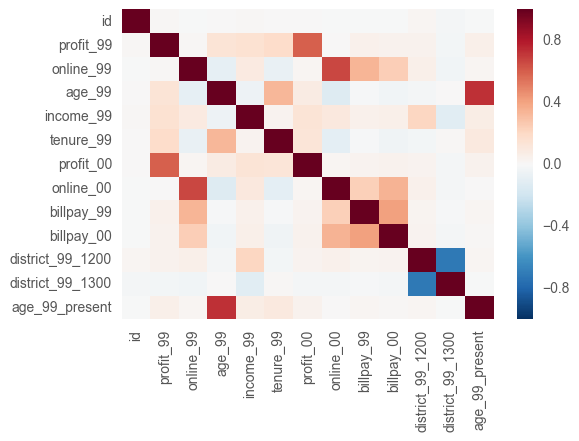

In [96]:
sns.heatmap(data.corr())